In [5]:
# from google.colab import drive
# drive.mount('/content/drive')

from numpy import load
from numpy import expand_dims
from numpy import asarray
from numpy import savez_compressed
from keras.models import load_model
from os import listdir
from os.path import isdir
from PIL import Image
from matplotlib import pyplot
import numpy as np
from numpy import savez_compressed
from numpy import asarray
import pickle
SVC_model_path = "C:/Users/Tanya/Desktop/FYP/FYP - Full Stack/classifier_model.pickle"
 

data = np.load('C:/Users/Tanya/Desktop/FYP/FYP - Full Stack/new_user_masked.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
print('Loaded: ', trainX.shape, trainy.shape, testX.shape, testy.shape)

Loaded:  (12, 160, 160, 3) (12,) (6, 160, 160, 3) (6,)


In [6]:
# load the facenet model

import pickle
#model_path = "/content/drive/MyDrive/FYP DY2/recognition_model.pickle"
model = load_model('C:/Users/Tanya/Desktop/FYP/FYP - Full Stack/facenet_keras.h5')

print('Loaded Model')
print("trainX------------",trainy)
print("testX---------------",testy)

Loaded Model
trainX------------ ['Darshna_Sadhnani' 'Darshna_Sadhnani' 'Darshna_Sadhnani'
 'Darshna_Sadhnani' 'Minnie_TK' 'Minnie_TK' 'Minnie_TK' 'Minnie_TK'
 'Minnie_TK' 'Sri_Charan' 'Sri_Charan' 'Sri_Charan']
testX--------------- ['Darshna_Sadhnani' 'Darshna_Sadhnani' 'Minnie_TK' 'Minnie_TK'
 'Sri_Charan' 'Sri_Charan']


In [7]:
# calculate a face embedding for each face in the dataset using facenet
from numpy import load
from numpy import expand_dims
from numpy import asarray
from numpy import savez_compressed
from keras.models import load_model
 
# get the face embedding for one face
def get_embedding(model, face_pixels):
    # scale pixel values
    face_pixels = face_pixels.astype('float32')
    # standardize pixel values across channels (global)
    mean, std = face_pixels.mean(), face_pixels.std()
    face_pixels = (face_pixels - mean) / std
    # transform face into one sample
    samples = expand_dims(face_pixels, axis=0)
    # print("Samples----",len(samples))
    # make prediction to get embedding
    yhat = model.predict(samples)
    return yhat[0]
 
def save_embeddings():
  #load the face dataset
    data = np.load('C:/Users/Tanya/Desktop/FYP/FYP - Full Stack/new_user_masked.npz')
    trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
    print('Loaded: ', trainX.shape, trainy.shape, testX.shape, testy.shape)
  #trainX = trainX.reshape(trainX.shape[0], trainX.shape[1]*trainX.shape[2]*trainX.shape[3])
  # load the facenet model
    model = load_model('C:/Users/Tanya/Desktop/FYP/FYP - Full Stack/facenet_keras.h5')
  #model = pickle.load(open(model_path,'rb'))
    print('Loaded Model')
  # convert each face in the train set to an embedding
    newTrainX = list()
    for face_pixels in trainX:
        embedding = get_embedding(model, face_pixels)
        newTrainX.append(embedding)
    newTrainX = asarray(newTrainX)
    print(newTrainX.shape)
  # convert each face in the test set to an embedding
    newTestX = list()
    for face_pixels in testX:
        embedding = get_embedding(model, face_pixels)
        newTestX.append(embedding)
    newTestX = asarray(newTestX)
    print(newTestX.shape)
  # save arrays to one file in compressed format
    savez_compressed('C:/Users/Tanya/Desktop/FYP/FYP - Full Stack/new-user-face-embeddings_masked.npz', newTrainX, trainy, newTestX, testy)

save_embeddings()

Loaded:  (12, 160, 160, 3) (12,) (6, 160, 160, 3) (6,)
Loaded Model
(12, 128)
(6, 128)


Dataset: train=27, test=10
[[0.04259842 0.11608721 0.03675436 0.05640527 0.22934312 0.04540679
  0.47340483]]
Predicted: Sri_Charan (47.340)
Expected: Sri_Charan


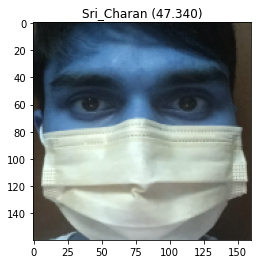

In [8]:
# develop a classifier for the 5 Celebrity Faces Dataset
from random import choice
from numpy import load
from numpy import expand_dims
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC
from matplotlib import pyplot
# load faces
data = load('C:/Users/Tanya/Desktop/FYP/FYP - Full Stack/new_user_masked.npz')
testX_faces = data['arr_2']

data1 = load('C:/Users/Tanya/Desktop/FYP/FYP - Full Stack/5-celebrity-faces-dataset_masked.npz')
testX_faces1 = data1['arr_2']

testX_faces = np.concatenate([testX_faces,testX_faces1])
# load face embeddings
data = load('C:/Users/Tanya/Desktop/FYP/FYP - Full Stack/new-user-face-embeddings_masked.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']

data1 = load('C:/Users/Tanya/Desktop/FYP/FYP - Full Stack/5-celebrity-faces-embeddings_masked.npz')
trainX1, trainy1, testX1, testy1 = data1['arr_0'], data1['arr_1'], data1['arr_2'], data1['arr_3']

trainX = np.concatenate([trainX,trainX1])
trainy = np.concatenate([trainy,trainy1])
testX = np.concatenate([testX,testX1])
testy = np.concatenate([testy, testy1])
print('Dataset: train=%d, test=%d' % (trainX.shape[0], testX.shape[0]))
# normalize input vectors
in_encoder = Normalizer(norm='l2')
trainX = in_encoder.transform(trainX)
testX = in_encoder.transform(testX)
# label encode targets
out_encoder = LabelEncoder()
out_encoder.fit(trainy)
trainy = out_encoder.transform(trainy)
testy = out_encoder.transform(testy)
# fit model
model = SVC(kernel='linear', probability=True)
model.fit(trainX, trainy)
# test model on a random example from the test dataset
selection = choice([i for i in range(testX.shape[0])])
#selection = 5
random_face_pixels = testX_faces[selection]
random_face_emb = testX[selection]
random_face_class = testy[selection]
random_face_name = out_encoder.inverse_transform([random_face_class])
# prediction for the face
samples = expand_dims(random_face_emb, axis=0)
yhat_class = model.predict(samples)
yhat_prob = model.predict_proba(samples)
print(yhat_prob)
# get name
class_index = yhat_class[0]
class_probability = yhat_prob[0,class_index] * 100
predict_names = out_encoder.inverse_transform(yhat_class)
print('Predicted: %s (%.3f)' % (predict_names[0], class_probability))
print('Expected: %s' % random_face_name[0])
# plot for fun
pyplot.imshow(random_face_pixels)
title = '%s (%.3f)' % (predict_names[0], class_probability)
pyplot.title(title)
pyplot.show()

In [9]:
#NEW USER ENROLLMENT 
# Step 1: Saving the model and reloading it 
import pickle 
model_path = "/content/drive/MyDrive/FYP DY2/classifier_model.pickle"
pickle.dump(model, open(SVC_model_path, 'wb'))

# trained_model = pickle.load(open(model_path,'rb'))

# Step 2: Extract the new saved image compressed file
# Step 3: Run the model on it
